__Ejercicio 1:__ Crear una rutina que calcule las raices de la siguiente ecuación trascendental: 
$$x \tan(x)=\sqrt{A-x^2},$$
esta ecuación tiene interes en la física cuántica de particulas en una dimensión, en particular, sus soluciones estan directamente relacionadas con las eigenenergias del _pozo finito cuadrado_, y el número de soluciones posibles es precisamente el número de estados _ligados_ que caben en el pozo.

__Nota:__ Usar varias condiciones iniciales $x_0$.

__Ejercicio 2:__ Una vez concluido este ejercicio, deberán crear un repositorio en _github.com_ llamado "Fisica\_Computacional\_Apellido1\_Apellido2", github les dara la opción de inicializarlo con el archivo de _markdown_ _README.md_, github usa este archivo para presenar brevemente de que se trata el repositorio recién creado. 

1. En ese archivo pongan simplemente "Tareas de Su_Nombre".

2. Una vez creado el repositorio deberán hacer un git clone en la maquina virtual que proporciona JuliaBox o en su computadora según les convenga.

3. Para hacer su primera contribución al repositorio, copiaran el notebook del ejercicio anterior dentro de la carpeta del repositorio.

4. Hecho esto hagan `git status` para ver que ha cambiado en nuestro repositorio.

5. Luego, con `git add nombre_del_archivo` agregarán el notebook recién creado para que git siga los cambios. Recuerden que se pueden agregar mas archivos según sus necesidades, digamos `git add nombre_del_archivo1 nombre_del_archivo2`

6. Luego, con `git commit -m'primer ejercicio de git'` creamos un _nodo_ en la carpeta .git, la cual git usa para darle seguimiento a nuestros archivos. Un _nodo_ constituye un _estado_ de nuestro repositorio, estos son usados para registrar los cambios importantes y tener puntos de control si tenemos que regresar a recuperar algo.

7. Finalmente, con `git push` subimos los cambios del repositorio local al remoto, es decir, ahora el repositorio remoto, en _github_ cuenta con el _estado_ más actual de nuestro trabajo. `git push` es lo mismo que `git push origin master` para nuestro caso (el más simple), `origin` es la etiqueta que tiene por defecto la dirección del repositorio remoto, mientras que `master` es la _rama_ del repositorio. Para hacer las cosas simples de momento solo trabajaremos en una rama, es decir, no habrá nodos que se dividan en dos caminos distintos (o más) del repositorio.

__Nota:__ Una vez creado el repositorio, manden el _link_ a Lorena. La idea es que solo manden esto una vez, y cuando se llegue la fecha en que la nueva tarea debe estar en el repositorio, los ayudantes o el profesor simplemente revisen su repositorio.

## Mecanismo para entregar las tareas de programación

Una vez hecha una tarea, o un ejercicio en clase, se deberán seguir los pasos anteriores para subir sus tareas a su repositorio remoto. Sin embargo, para que los ayudantes sepan cuando revisar si ya hay algo mas dentro, deberán enviarle un correo al ayudante _que toque_ (yo les dire quién) con el asunto #Tarea_Apellidos, y en el cuerpo del correo deberá ir el _enlace_ de su repositorio.

## Graficas usando PyPlot: Ejemplo 1

In [18]:
using PyPlot

INFO: Installing PyQt5 via Anaconda's /home/david/anaconda3/bin/conda...


Fetching package metadata .........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/david/anaconda3:
#
pyqt                      4.11.4                   py34_4  


In [ ]:
x=linspace(-10,10,1000);
y=cos.(x);

In [ ]:
plot(x,y) # la sintaxis es muy parecida a matlab

* matplotlib brinda mas opciones:

In [ ]:
xlabel("x")
ylabel("y")
title("Cos(x)")
grid("on")
plot(x,y)

## Graficas usando PyPlot: Ejemplo 2

En este ejemplo se muestra como converge el metodo de los babilonios a la raiz cuadrada deseada.

In [ ]:
list=zeros(30);
S=10000;
x=0.0001;
for i in 1:30
    x=0.5(x+S/x);
    list[i]=x;
end

In [ ]:
x=linspace(0,35,100);
y=S*ones(length(x));

In [ ]:
scatter(1:30,list);
plot(x,y);
xlim(0,30);

## Graficas usando PyPlot: Ejemplo 3

Gráfica que muestra las intersecciones de $x \tan(x)$ y $\sqrt(A-x^2)$

In [33]:
x=linspace(-10,10,10000);
y1=sqrt.(100.0-x.^2 +im-im);
y2=x.*tan.(x);
y3=y2-y1;

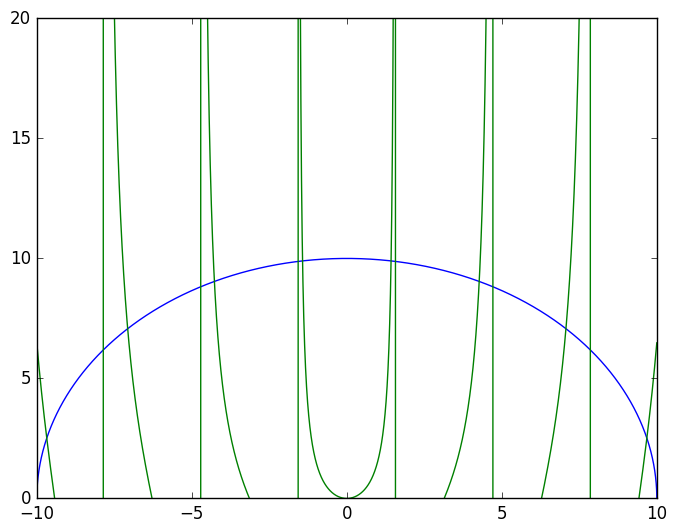

In [32]:
plot(x,y1)
plot(x,y2)
ylim(0,20)
show()

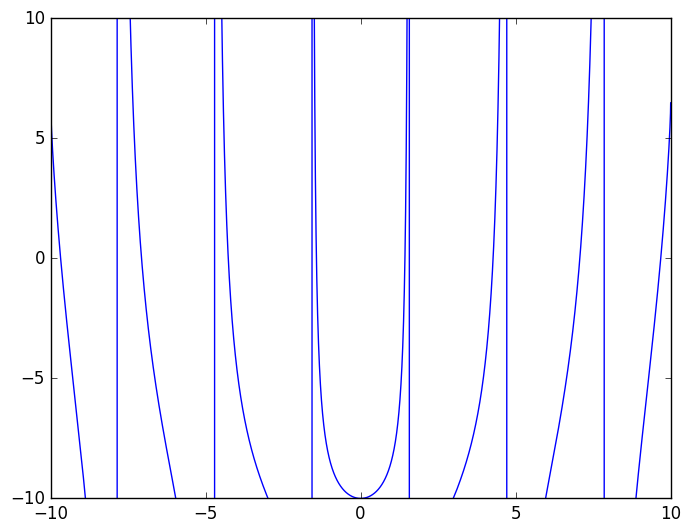

In [37]:
plot(x,y3)
ylim(-10,10)
show()

# Usando Julia como CAS llamando a SymPy

Si todavia no contamos con la libreria en nuestra biblioteca, podemos añadirla haciendo:

In [1]:
using SymPy

Primero definimos las variables simbólicas que vamos a usar:

In [61]:
A,x,a,n,m=Sym("A,x,a,n,m")

(A, x, a, n, m)

In [5]:
typeof(n)

SymPy.Sym

Evaluando la suma sugerida en el exámen

In [6]:
summation(a^n,(n,0,m))

⎧   m + 1      for a = 1
⎪                       
⎪   m + 1               
⎨- a      + 1           
⎪────────────  otherwise
⎪   -a + 1              
⎩                       

## Cálculo

In [7]:
integrate(x,x)

 2
x 
──
2 

In [16]:
diff(sin(x),x)

cos(x)

Si $x$ es simbólica y llamamos al $\sin$, Julia autómaticamente usa la función apropiada:

In [17]:
typeof(ans)

SymPy.Sym

In [18]:
?SymPy.sin

```
sin(x)
```

Compute sine of `x`, where `x` is in radians.

`sin`: a SymPy function. The SymPy documentation can be found through: http://docs.sympy.org/latest/search.html?q=sin


La función que tenian que derivar a mano para el ejercicio del método de Newton-Raphson

In [25]:
f=simplify(diff(x*tan(x)-sqrt(A-x^2),x))

   x             x                 
─────── + ──────────────── + tan(x)
   2         _____________         
cos (x)     ╱    2                 
          ╲╱  - x  + 10.0          

## Conversión de funciones

El siguiente comando convierte una funcion de SymPy en una funcion de Julia:

In [29]:
A=10.0;simplify(f(x))

   x             x            sin(2⋅x)
─────── + ──────────────── + ─────────
   2         _____________        2   
cos (x)     ╱    2           2⋅cos (x)
          ╲╱  - x  + 10.0             

Uno puede evaluar directamente la función en un valor númerico, sin embargo el _output_ sigue siendo un objeto simbólico:

In [47]:
f(0.1)

0.232979976586117

In [49]:
typeof(ans)

SymPy.Sym

Podemos pasar el resultado a otra función y se sigue tratando como un objeto simbólico:

In [50]:
cos(f(0.1))

0.972982705126180

Con la función _lambify_ podemos convertir una función de SymPy directamente en una función de Julia,típicamente hacer esto nos permite hacer rutinas mas eficientes:

In [51]:
fjulia=lambdify(f,[x]);

In [54]:
fjulia(0.1)

0.23297997658611666

In [55]:
typeof(ans)

Float64

Podemos comprobar que todo salio bien haciendo la derivada númerica:

In [38]:
function ff(x)
    A=10.0
    return  x*tan(x)-sqrt(A-x^2)
end

ff (generic function with 1 method)

In [56]:
(ff(0.1+0.001)-ff(0.1))/0.001

0.2341586674305951

Si queremos convertir funciones de Julia en funciones de SymPy, podemos hacer los siguiente:

Primero definimos una función en Julia:

In [57]:
function r(x)
   return x^2 
end;

Luego, como ya definimos $x$ como una variable simbólica, simplemente evaluamos nuestra función en dicha variable:

In [58]:
r(x)

 2
x 

Ya podemos, por ejemplo, derivar sin problema:

In [59]:
diff(r(x),x)

2⋅x

In [60]:
diff(cos(r(x)),x)

        ⎛ 2⎞
-2⋅x⋅sin⎝x ⎠

## Evaluación de funciones sobre vectores e intervalos

Ya se comentó en la clase anterior que para pasar arreglos u otros objetos como los que construimos con _range_ y _linspace_ a una función, típicamente bastaba con hacer `f(x)` donde $x$ es un arreglo, sin embargo la versión más reciente de Julia nos pide que lo escribamos como `f.(x)`. Por ej: `cos.(x)`.

Recordemos la función rango:

In [32]:
typeof(1:3)

UnitRange{Int64}

Podemos pedir el rango a pasos diferentes:

In [86]:
a=1:0.02:3
typeof(a)

StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}

In [92]:
b=linspace(1.0,3.0,101)
typeof(b)

StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}

In [93]:
(3-1)/100

0.02

In [94]:
a==b

true

In [95]:
last(a)

3.0

In [96]:
last(b)

3.0

In [97]:
length(b)

101

Evaluamos ahora la función que definimos arriba en un intervalo:

In [99]:
ff.(linspace(0.0,1.0,100))

100-element Array{Float64,1}:
 -3.16228
 -3.16216
 -3.1618 
 -3.16121
 -3.16039
 -3.15932
 -3.15802
 -3.15648
 -3.1547 
 -3.15268
 -3.15043
 -3.14793
 -3.14519
  ⋮      
 -1.93985
 -1.90128
 -1.86155
 -1.82062
 -1.77842
 -1.73491
 -1.69002
 -1.6437 
 -1.59587
 -1.54646
 -1.49539
 -1.44259

# Métodos para buscar raíces

## Método de bisección 
Para aplicar este método consideremos tres sucesiones $a_n \le p_n \le b_n$ definidas por las siguientes relaciones

$$ p_n = \frac{a_n+b_n}{2},
\quad a_{n+1} = \begin{cases}
a_n & \mbox{si } f(a_n)\cdot f(p_n) <0 \\
p_n & \mbox{si } f(a_n)\cdot f(p_n) > 0\end{cases},
\quad b_{n+1} = \begin{cases}
b_n & \mbox{si } f(b_n)\cdot f(p_n) < 0 \\
p_n & \mbox{si } f(b_n)\cdot f(p_n) > 0\end{cases}$$

Donde los valores iniciales vienen dados por:

$$a_0 := a, \quad b_0 := b.$$

Se puede probrar que las tres sucesiones convergen al valor de la única raíz del intervalo:

$$ \lim_{n \to \infty} a_n = \lim_{n \to \infty} p_n = \lim_{n \to \infty} b_n.$$

### Ejemplo método de bisección

Para la función $f(x) = x^3-x-2$

In [68]:
function biseccion(a,b)
    p = (a+b)/2
    f(x) = x^3-x-2
    for i in 1:50
        if  f(a)*f(p) > 0
            a = p
        end
        
        if f(b)*f(p) > 0
            b = p
        end
        p = (a+b)/2
    end
    return p,f(p)
end;

In [69]:
biseccion(0,2)

(1.5213797068045674, -1.3322676295501878e-15)

# Ejercicio/Tarea Martes 29 de Agosto

__Utilizar lo que hemos visto hasta ahora de Julia para:__

1. Graficar como convergen $4$ condiciones iniciales a las raiz real de $x^3 - x^2 - x - 1$ utilizando el método de Newton. Ésto básicamente es gráficar como se mueven los puntos $x_k$, luego grafiquen el error relativo a la raiz, es decir $(x_k-S)/S$, donde $S$ es la raiz.

2. Crear una función en Julia que implemente el método de Newton para funciones arbitrarias. Deberán crearla con las siguientes consideraciones:
    * Que tome como argumentos tanto a la función, su derivada y la condición inicial.
    * Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un intervalo, por ejemplo costruido con `linspace`, recordando que hay que llamar a las funciones con un punto `f.(x)`.
    * Combinar las dos formas en una sola rutina, aqui será necesario poner un condicional `if` que verifique de que tipo es el _input_.
    * Finalmente, desarrollen una función similar a la anterior, siguiendo los mismos pasos, pero esta vez que los _inputs_ de la función del método sea solamente la función y la condición (o intervalo) inicial.
        * Para esto deberán usar lo que aprendimos de SymPy y como podemos convertir y/o evaluar funciones tanto en simbolos como en flotantes.
        
__Nota:__ Se resolveran dudas de esta tarea el Jueves 24, así que traten de avanzar para que surjan dudas.